In [34]:
import pandas as pd
import nltk as nltk
import nltk.corpus
from nltk.text import Text
from collections import Counter

In [2]:
news = pd.read_pickle('news_cat.pkl')

In [3]:
news.head()

,crawled,language,text,title
0,2018-01-30T23:03:51.004+02:00,english,by Abhishek K Global Telehandler Market 2023 D...,Global Telehandler Market 2023 Demand by Segme...
1,2018-01-30T23:06:46.024+02:00,english,favorite this post 2014 Caterpillar 314E LCR h...,2014 Caterpillar 314E LCR
2,2018-01-30T23:18:35.023+02:00,english,By: MAX NISEN The Amazon health care threat ha...,"Amazon, Berkshire, JPMorgan health announcemen..."
3,2018-01-30T23:20:54.012+02:00,english,QR Code Link to This Post MONTHLY PUBLIC AUCTI...,2005 Caterpillar CB534D Tandem Vibratory Rolle...
4,2018-01-30T23:28:30.000+02:00,english,QR Code Link to This Post 2007 CATERPILLAR D4G...,2007 CATERPILLAR D4G LGP CAB SCREEN/SWEEPS - O...


In [15]:
# Discard non-English results
news_cat = news[(news.language == 'english')]
                      
# news mentioned Caterpillar 
news_cat = news_cat[(news_cat.text.str.contains('Caterpillar'))\
                    & (news_cat.title.str.contains('Caterpillar'))]
news_cat.head()

,crawled,language,text,title
1,2018-01-30T23:06:46.024+02:00,english,favorite this post 2014 Caterpillar 314E LCR h...,2014 Caterpillar 314E LCR
3,2018-01-30T23:20:54.012+02:00,english,QR Code Link to This Post MONTHLY PUBLIC AUCTI...,2005 Caterpillar CB534D Tandem Vibratory Rolle...
5,2018-01-30T23:33:58.023+02:00,english,Elite Wealth Management Inc. Acquires Shares o...,Elite Wealth Management Inc. Acquires Shares o...
11,2018-01-31T01:52:38.000+02:00,english,"Top Stock Picks for the Week of Jan 29, 2018 (...",Somewhat Favorable News Coverage Somewhat Unli...
14,2018-01-31T02:42:54.001+02:00,english,Caterpillar Marine announces open order board ...,Caterpillar Marine announces open order board ...


In [5]:
def clean_text(text,isalpha = True):
    # tokenize words
    text_words = nltk.word_tokenize(text)
    # keep words with length >2
    words = [word for word in text_words if len(word) > 2]
    if isalpha is True:
        words = [word for word in words if word.isalpha()]
    # remove Stop words
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stopwords]
    # Lemmation 
    wnl = nltk.WordNetLemmatizer()
    words = [wnl.lemmatize(t) for t in words]
    return " ".join(words)

### NE chunk with post tag word token

In [52]:
entities_num = Counter()
for index in news_cat.index:
    title = clean_text(news_cat.loc[index, 'title'],True)
    text = clean_text(news_cat.loc[index, 'text'], True)
    
    for sent in nltk.sent_tokenize(title):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)),binary = False):
            if hasattr(chunk, 'label') and chunk.label()=='ORGANIZATION':
                og_name = ' '.join(c[0] for c in chunk).upper() #Add space as between 
                if og_name.find('CATERPILLAR')<0: # exclude or_name with caterpillar
                    entities_num[og_name] += 1
                
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)),binary = False):
            if hasattr(chunk, 'label') and chunk.label()=='ORGANIZATION':
                og_name = ' '.join(c[0] for c in chunk).upper() #Add space as between 
                if og_name.find('CATERPILLAR')<0:
                    entities_num[og_name] += 1

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,8)

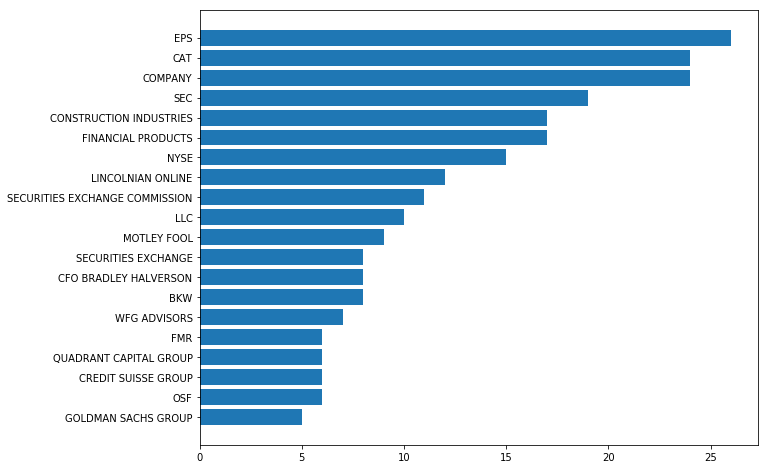

In [91]:
sorted_indices = np.argsort(top_20['Frequency'])
y_pos = range(len(top_20.Frequency))
plt.barh(y_pos, top_20.Frequency[sorted_indices], align='center')
plt.yticks(y_pos, top_20.Organization[sorted_indices])
plt.show()